a)Load the ‘Student Performance’ dataset into one of the data structures (NumPy or Pandas).

b)Display header rows and description of the loaded dataset.

c) Remove unnecessary features (E.g. drop unwanted columns) from the dataset such as ‘lunch’ and ‘test preparation course’ .

d) Manipulate data by replacing empty column values in ‘parental level of education’ with a default value.

e) Convert the attribute ‘race/ethnicity’ to have ‘groupA’ to be ‘Asian Students’, ‘groupB’ to be ‘African Students’ ,  ‘groupC’ to be ‘Afro-Asian Students’, ‘groupD’ to be ‘American Students’ and ‘groupE’ to be ‘European Students’. 

f) Perform the following visualizations on the loaded dataset:
    i)   Tally of the Number of Male & Female students who took up the ‘test preparation course’ and those who did not.
    ii)  Total Number of Male & Female Students belonging to each student group
    iii) No of students who ‘failed’(less than 40), ‘second class’(between 40 & 50).  
         ‘first class’(between 60 & 75) and ‘distinction’(above 75) in ‘Maths’, 
         ‘Reading’ and ‘Writing’. 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("datasets/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [5]:
df.describe()

,mathscore,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    774 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
mathscore                      1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [8]:
df.drop(["lunch", "test preparation course"], axis=1, inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NaN,76,78,75


In [9]:
df["parental level of education"]=df["parental level of education"].fillna("X")
df.head()

,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,X,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,X,76,78,75


In [10]:
df["race/ethnicity"]=df["race/ethnicity"].map({'group A' : 'Asian Students', 'group B' : 'African Students' ,  'group C' :'Afro-Asian Students', 'group D' : 'American Students', 'group E' : 'European Students' })
df.head()

,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,African Students,bachelor's degree,72,72,74
1,female,Afro-Asian Students,X,69,90,88
2,female,African Students,master's degree,90,95,93
3,male,Asian Students,associate's degree,47,57,44
4,male,Afro-Asian Students,X,76,78,75


# Data Visualization

In [11]:
df=pd.read_csv("datasets/StudentsPerformance.csv")
df["test preparation course"]=df["test preparation course"].map({"none":"NO", "completed":"YES"})
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,NO,72,72,74
1,female,group C,NaN,standard,YES,69,90,88
2,female,group B,master's degree,standard,NO,90,95,93


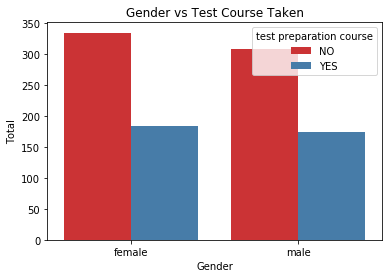

In [12]:
ax = sns.countplot(x = 'gender', hue = 'test preparation course', palette = 'Set1',data = df)
ax.set(title = 'Gender vs Test Course Taken', xlabel = 'Gender', ylabel = 'Total')
plt.show()

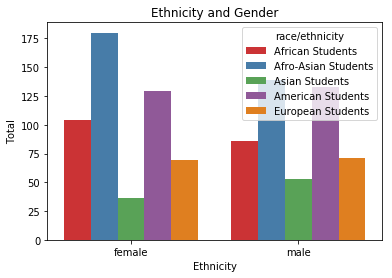

In [13]:
df["race/ethnicity"]=df["race/ethnicity"].map({'group A' : 'Asian Students', 'group B' : 'African Students' ,  'group C' :'Afro-Asian Students', 'group D' : 'American Students', 'group E' : 'European Students' })
ax = sns.countplot(x = 'gender', hue = 'race/ethnicity', palette = 'Set1',data = df)
ax.set(title ="Ethnicity and Gender" , xlabel = 'Ethnicity', ylabel = 'Total')
plt.show()

In [14]:
df['totalmarks']=df['mathscore']+df['reading score']+df["writing score"]

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,totalmarks
0,female,African Students,bachelor's degree,standard,NO,72,72,74,218
1,female,Afro-Asian Students,NaN,standard,YES,69,90,88,247
2,female,African Students,master's degree,standard,NO,90,95,93,278
3,male,Asian Students,associate's degree,free/reduced,NO,47,57,44,148
4,male,Afro-Asian Students,NaN,standard,NO,76,78,75,229


 ## No of students who 
 #### ‘failed’(less than 40)
 #### ‘second class’(between 40 & 50).  
 #### ‘first class’(between 60 & 75) 
 #### 'distinction’(above 75) 
 #### in ‘Maths’, ‘Reading’ and ‘Writing


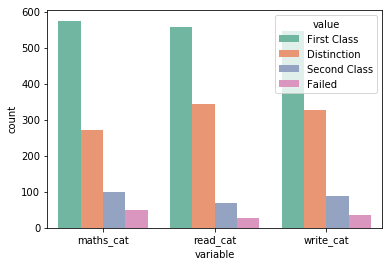

In [16]:
interval = (0,40,50,75,120)
categories = ['Failed','Second Class','First Class', 'Distinction']
df['maths_cat'] = pd.cut(df['mathscore'], interval, labels = categories)
df['read_cat'] = pd.cut(df['reading score'], interval, labels = categories)
df['write_cat'] = pd.cut(df['writing score'], interval, labels = categories)

df1=pd.DataFrame(df, columns=['maths_cat','read_cat', 'write_cat'])
sns.countplot(x="variable", hue="value", data=pd.melt(df1), palette = 'Set2')
plt.show()

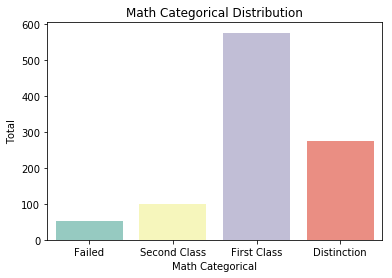

In [17]:
ax1 = sns.countplot(x ='maths_cat', data = df,  palette = 'Set3')
ax1.set(xlabel='Math Categorical', ylabel='Total',
       title="Math Categorical Distribution")
plt.show()

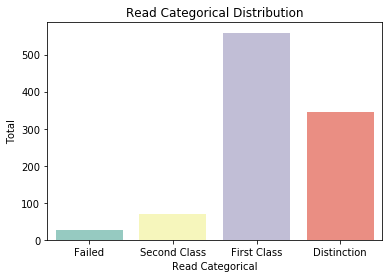

In [18]:
ax2 = sns.countplot(x ='read_cat', data = df,  palette = 'Set3')
ax2.set(xlabel='Read Categorical', ylabel='Total',
       title="Read Categorical Distribution")
plt.show()

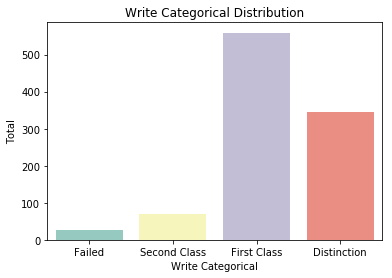

In [19]:
ax3 = sns.countplot(x ='read_cat', data = df,  palette = 'Set3')
ax3.set(xlabel='Write Categorical', ylabel='Total',
       title="Write Categorical Distribution")
plt.show()

In [20]:
pd.melt(df1)

,variable,value
0,maths_cat,First Class
1,maths_cat,First Class
2,maths_cat,Distinction
3,maths_cat,Second Class
4,maths_cat,Distinction
5,maths_cat,First Class
6,maths_cat,Distinction
7,maths_cat,Failed
8,maths_cat,First Class
9,maths_cat,Failed
